In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [29]:
train_data = pd.read_csv("../data/titanic/train.csv")
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [30]:
train_data.shape

(8693, 14)

In [31]:
train_data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [57]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
HomePlanet,8693.0,0.649833,0.795183,0.0,0.0,0.0,1.0,2.0
CryoSleep,8693.0,0.349362,0.476796,0.0,0.0,0.0,1.0,1.0
Destination,8693.0,1.494306,0.814966,0.0,1.0,2.0,2.0,2.0
VIP,8693.0,0.022892,0.149568,0.0,0.0,0.0,0.0,1.0
RoomService,8693.0,220.009318,660.519050,0.0,0.0,0.0,41.0,14327.0
FoodCourt,8693.0,448.434027,1595.790627,0.0,0.0,0.0,61.0,29813.0
ShoppingMall,8693.0,169.572300,598.007164,0.0,0.0,0.0,22.0,23492.0
Spa,8693.0,304.588865,1125.562559,0.0,0.0,0.0,53.0,22408.0
VRDeck,8693.0,298.261820,1134.126417,0.0,0.0,0.0,40.0,24133.0
Transported,8693.0,0.503624,0.500016,0.0,0.0,1.0,1.0,1.0


In [33]:
#Filling na values 

#For Categorical variables we fill na values with the most frequently occuring value - mode 
categorical_variables = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]
mode = train_data[categorical_variables].mode().iloc[0]

In [34]:
train_data[categorical_variables] = train_data[categorical_variables].fillna(mode)
train_data.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [35]:
#For Continous variables we fill na values with the middle most occuring value - median 
continous_variables = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
median = train_data[continous_variables].median()
median

Age             27.0
RoomService      0.0
FoodCourt        0.0
ShoppingMall     0.0
Spa              0.0
VRDeck           0.0
dtype: float64

In [36]:
train_data[continous_variables] = train_data[continous_variables].fillna(median)
train_data.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [37]:
train_data = train_data.drop("Name", axis=1)
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [38]:
train_data[['Deck', 'Num', 'Side']] = train_data['Cabin'].str.split("/", expand = True)
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S


In [39]:
train_data = train_data.drop("Cabin", axis=1)
train_data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

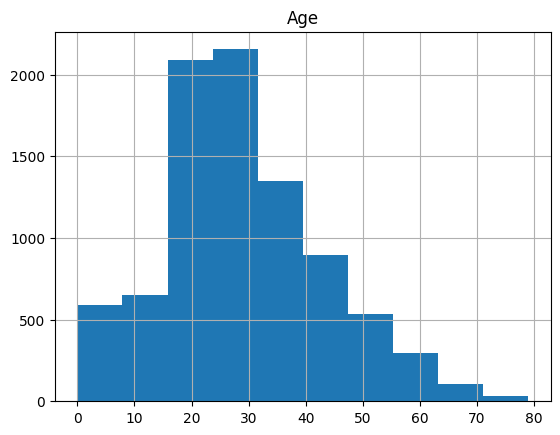

In [40]:
train_data.hist("Age")

In [41]:
train_data.Age.describe()

count    8693.000000
mean       28.790291
std        14.341404
min         0.000000
25%        20.000000
50%        27.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

In [42]:
#Converting Age into categorical variable consiting of 4 groups - Child (0-12), Teenager (13-21), Adult(21-45), Older(45+)
labels=['Child', 'Teenager', 'Adult', 'Older']
bins = [0, 12, 21, 45, 80]
train_data['Age_Group'] = pd.cut(train_data['Age'], bins=bins, labels=labels)
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Age_Group
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,Adult
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,Adult
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,Older
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,Adult
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,Teenager


In [43]:
train_data = train_data.drop("Age", axis=1)
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Age_Group
0,0001_01,Europa,False,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,Adult
1,0002_01,Earth,False,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,Adult
2,0003_01,Europa,False,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,Older
3,0003_02,Europa,False,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,Adult
4,0004_01,Earth,False,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,Teenager


In [44]:
# We use Label Encoder to get our categorical variables in numerical values
lbe = LabelEncoder()
categorical_vars = ["HomePlanet","CryoSleep","Destination","VIP","Deck","Num","Side","Age_Group","Transported"]
train_data[categorical_vars] = train_data[categorical_vars].apply(lbe.fit_transform)
train_data

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Age_Group
0,0001_01,1,0,2,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
1,0002_01,0,0,2,0,109.0,9.0,25.0,549.0,44.0,1,5,0,1,0
2,0003_01,1,0,2,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1,2
3,0003_02,1,0,2,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1,0
4,0004_01,0,0,2,0,303.0,70.0,151.0,565.0,2.0,1,5,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,1795,0,0
8689,9278_01,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0,6,548,1,3
8690,9279_01,0,0,2,0,0.0,0.0,1872.0,1.0,0.0,1,6,551,1,0
8691,9280_01,1,0,0,0,0.0,1049.0,0.0,353.0,3235.0,0,4,1385,1,0


In [45]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
HomePlanet,8693.0,0.649833,0.795183,0.0,0.0,0.0,1.0,2.0
CryoSleep,8693.0,0.349362,0.476796,0.0,0.0,0.0,1.0,1.0
Destination,8693.0,1.494306,0.814966,0.0,1.0,2.0,2.0,2.0
VIP,8693.0,0.022892,0.149568,0.0,0.0,0.0,0.0,1.0
RoomService,8693.0,220.009318,660.519050,0.0,0.0,0.0,41.0,14327.0
FoodCourt,8693.0,448.434027,1595.790627,0.0,0.0,0.0,61.0,29813.0
ShoppingMall,8693.0,169.572300,598.007164,0.0,0.0,0.0,22.0,23492.0
Spa,8693.0,304.588865,1125.562559,0.0,0.0,0.0,53.0,22408.0
VRDeck,8693.0,298.261820,1134.126417,0.0,0.0,0.0,40.0,24133.0
Transported,8693.0,0.503624,0.500016,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:>

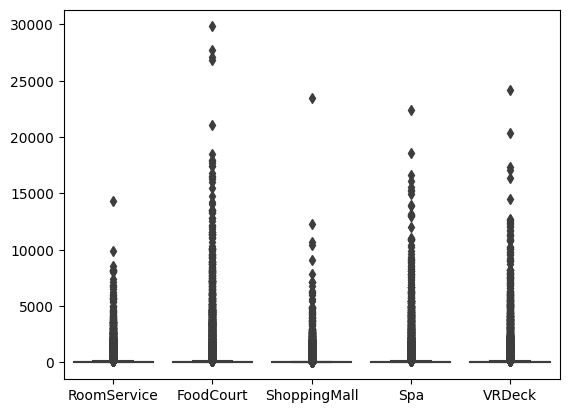

In [46]:
sns.boxplot(data=train_data[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]])

In [47]:
tenth_percentile = np.percentile(train_data["RoomService"], 10)
ninetyseventh_percentile = np.percentile(train_data["RoomService"], 97)
print(f"10% - {tenth_percentile}\n97% - {ninetyseventh_percentile}")

10% - 0.0
97% - 1759.199999999999


In [48]:
train_data[train_data.RoomService>1800.0].shape

(252, 15)

In [49]:
X = train_data[['Deck', 'FoodCourt', 'RoomService', 'ShoppingMall', 'Spa', 'VRDeck']]
y = train_data.Transported

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=None)

In [51]:
threshold=0.3

In [52]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

C:\Users\Asus\AppData\Local\Temp\ipykernel_20760\4044432051.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_data.iloc[:,:-1].corr()


<AxesSubplot:>

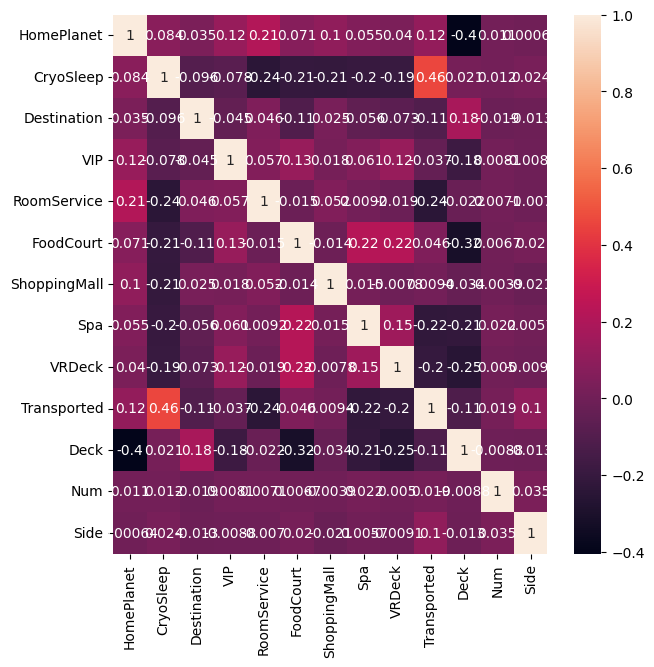

In [53]:
corr = train_data.iloc[:,:-1].corr()
top_feature = corr.index
plt.figure(figsize=(7,7))
sns.heatmap(train_data[top_feature].corr(), annot=True)

In [54]:
correlation(X, threshold)

{'FoodCourt'}

In [55]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_preds = dt_classifier.predict(X_test)
print(f"Decision Tree Classifier\nAccuracy Score : {accuracy_score(y_test, y_preds)*100}%")

Decision Tree Classifier
Accuracy Score : 74.23806785508913%
